<a id = "cont"></a>
# Contents:

1. [ Importing libraries and Reading data](#sec1)
2. [ Feature Engineering and Data Visualization](#sec2)
    - [Some Visualizations](#subsec1)
    - [Name Feature](#subsec2)
    - [Age Feature](#subsec3)
    - [Embarked Feature](#subsec4)
    - [Cabin Feature](#subsec5)
    - [Fare Feature](#subsec6)
    - [Sex Feature](#subsec7)
    - [Pclass Feature](#subsec8)
    - [SibSp and Parch Feature](#subsec9)
3. [ Train and Predict](#sec3)
    - [Logistic Regression](#subsec11)
    - [K Nearest Neighbors](#subsec12)
    - [Support Vector Machines](#subsec13)
    - [Decision Tree](#subsec14)
    - [Random Forest](#subsec15)
    - [Adaboost](#subsec16)
    - [Gradient Boosting](#subsec17)
    - [XGBoost](#subsec18)
4. [ Accuracy Comparison through Plot](#sec4)

<a id = "sec1"></a>
# Importing Libraries and Reading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
train_df = pd.read_csv('../input/titanic/train.csv')
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df = pd.read_csv('../input/titanic/test.csv')
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. **Numerical Columns: **Age(Continuous), Fare(Continuous), Sibsp(Discrete), Parch(Discrete)
2. **Categorical Columns: **Survived, Sex, Embarked, Pclass
3. **Other Columns: **PassengerID, Name, Ticket, Cabin

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "sec2"></a>
# Feature Engineering And Data Visualization

<a id = "subsec1"></a>
**Let's Visualize Data**

[Back to Contents(Click here)](#cont)

Correlation in Data

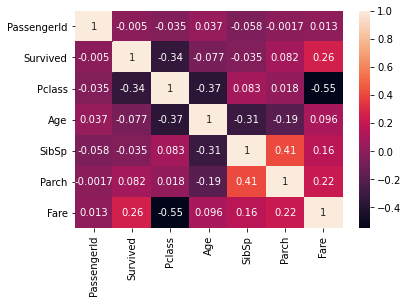

In [8]:
sns.heatmap(train_df.corr(), annot = True)

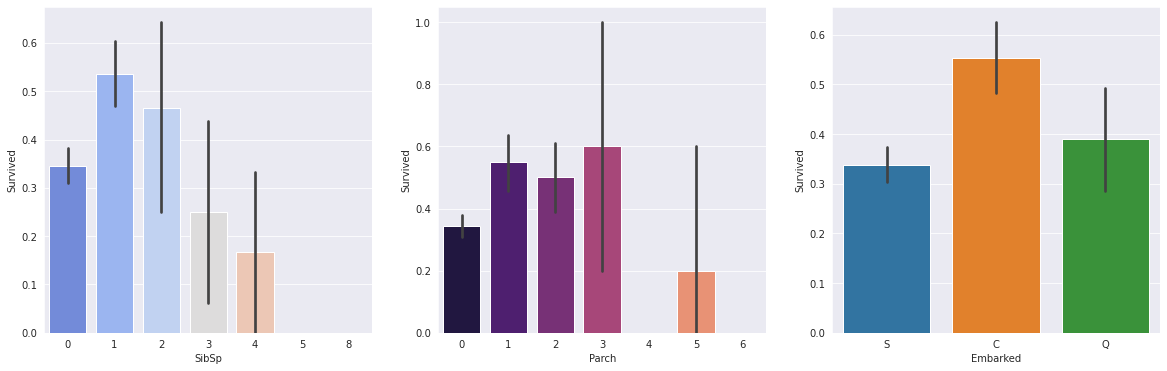

In [9]:
sns.set_style('darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 6))
sns.barplot(x = 'SibSp', y = 'Survived', data = train_df, ax = ax1, palette='coolwarm')
sns.barplot(x = 'Parch', y = 'Survived', data = train_df, ax = ax2, palette = 'magma')
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df, ax = ax3)

Text(0.5, 1.0, 'Male')

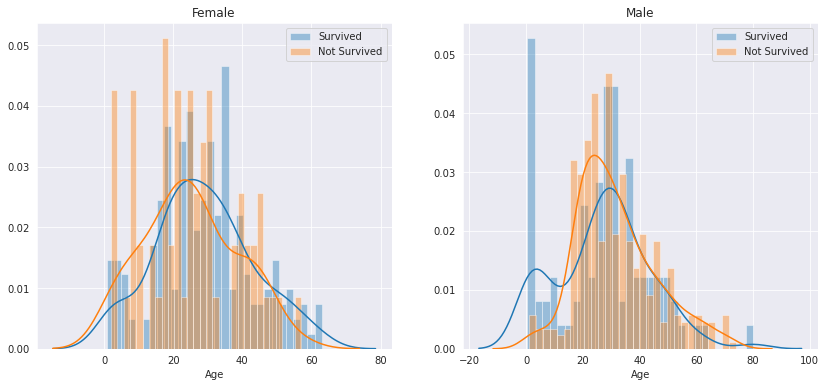

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
females = train_df[train_df['Sex'] == 'female']
males = train_df[train_df['Sex'] == 'male']

ax = sns.distplot(females[females['Survived'] == 1].Age, bins=30, label='Survived', ax=axes[0])
ax = sns.distplot(females[females['Survived'] == 0].Age, bins=30, label='Not Survived', ax=axes[0])
ax.legend()
ax.set_title('Female')
ax = sns.distplot(males[males['Survived'] == 1].Age, bins=30, label='Survived', ax=axes[1])
ax = sns.distplot(males[males['Survived'] == 0].Age, bins=30, label='Not Survived', ax=axes[1], )
ax.legend()
ax.set_title('Male')

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [11]:
df = [train_df, test_df]

<a id = "subsec2"></a>
**Name Feature**

Now we'll extract titles(salutation) from the 'Name' feature

In [12]:
for data in df:
    data['Title'] = data['Name'].str.extract(r', (\w+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex']).transpose()

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Most used titles are Mr, Miss, Master ,Mrs. Let's classify features into Mr, Miss, Master, Mrs and Rare.

In [13]:
for data in df:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title']).mean()

labels = {'Mr':1, 'Mrs':2, 'Master':3, 'Miss':4, 'Rare':5}
test_df.replace({'Title':labels}, inplace = True)
train_df.replace({'Title':labels}, inplace = True)
train_df['Title'] = train_df['Title'].fillna(0)
train_df['Title'] = train_df['Title'].astype(int)                     # this is performed beacuse it was giving float values of title

In [14]:
pd.DataFrame({'Train':train_df.isnull().sum(), 'Test':test_df.isnull().sum()}).transpose()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
Train,177.0,687.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Test,86.0,327.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


<a id = "subsec3"></a>
**Age Feature**

In [15]:
print('Missing Values in Age column: ',177/len(train_df['Age'])*100)
print('Missing Values in Cabin column: ',687/len(train_df['Cabin'])*100)
print('Missing Values in Embarked column: ',2/len(train_df['Embarked'])*100)

Missing Values in Age column:  19.865319865319865
Missing Values in Cabin column:  77.10437710437711
Missing Values in Embarked column:  0.22446689113355783


* Age column has ~20% of missing values. Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
* We will drop Cabin column because it's not possible to fill so many(77%) missing values.
* Embarked column with just ~0.2% missing values won't causing any issue.

Let's visualize missing values using seaborn.

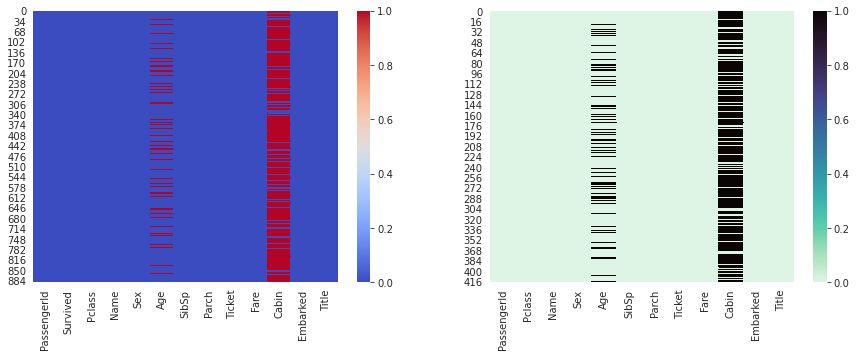

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,5))
sns.heatmap(train_df.isnull(), cmap = 'coolwarm', ax = ax1)
sns.heatmap(test_df.isnull(), cmap = 'mako_r', ax = ax2)

Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it is outlandish to fill every one of them with a similar worth (as we did with Embarked). Rather, how about we attempt to figure out how to predict the missing ages.

In [17]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)


In [18]:
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode() #Baby
rare_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult"}

for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "Unknown":
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]
        
for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "Unknown":
        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]

In [19]:
df_m = train_df[train_df['Survived'] == 0]
df_f = train_df[train_df['Survived'] == 1]
df_m = df_m['AgeGroup'].value_counts()
df_f = df_f['AgeGroup'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Not Survived', marker = dict(color = 'dodgerblue'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Survived', marker = dict(color = 'deeppink'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Age Distribution')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

In [20]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping).astype(int)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping).astype(int)

[Back to Contents(Click here)](#cont)

<a id = "subsec4"></a>
**Embarked Feature**

In [21]:
df_m = train_df[train_df['Sex'] == 'male']
df_f = train_df[train_df['Sex'] == 'female']
df_m = df_m['Embarked'].value_counts()
df_f = df_f['Embarked'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Male', marker = dict(color = 'indigo'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Female', marker = dict(color = 'green'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Embarked Distribution with Sex')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

In [22]:
df_m = train_df[train_df['Survived'] == 0]
df_f = train_df[train_df['Survived'] == 1]
df_m = df_m['Embarked'].value_counts()
df_f = df_f['Embarked'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Male', marker = dict(color = 'burlywood'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Female', marker = dict(color = 'cadetblue'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Embarked Distribution with Survived')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

Majority of people who survived embarked from S.

In [23]:
train_df['Embarked'].fillna('S', inplace = True)

label = {'S':1, 'C':2, 'Q':3}
train_df.replace({'Embarked':label}, inplace = True)
test_df.replace({'Embarked':label}, inplace = True)

<a id = "subsec5"></a>
**Cabin Feature**

I think the thought here is that individuals with recorded cabin numbers are of higher financial class, and in this manner bound to survive.

In [24]:
train_df['Cabin'] = train_df['Cabin'].fillna('X')
test_df['Cabin']=test_df['Cabin'].fillna('X')

We will extract first letter of assigned cabin and then map it into a category.

In [25]:
for data in df:
    data['Cabin'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'X':8, 'T':9}
for data in df:
    data['Cabin'] = data['Cabin'].map(category)

In [26]:
df_m = train_df[train_df['Survived'] == 0]
df_f = train_df[train_df['Survived'] == 1]
df_m = df_m['Cabin'].value_counts()
df_f = df_f['Cabin'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Not Survived', marker = dict(color = 'chartreuse'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Survived', marker = dict(color = 'darkred'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Cabin Distribution')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

[Back to Contents(Click here)](#cont)

<a id = "subsec6"></a>
**Fare Feature**

In [27]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

train_df['Fare'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])
test_df['Fare'] = pd.qcut(test_df['Fare'], 4, labels = [1, 2, 3, 4])

In [28]:
df_m = train_df[train_df['Survived'] == 0]
df_f = train_df[train_df['Survived'] == 1]
df_m = df_m['Fare'].value_counts()
df_f = df_f['Fare'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Not Survived', marker = dict(color = 'coral'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Survived', marker = dict(color = 'teal'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Fare Distribution')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

In [29]:
#if we check the data info then fare feature is a category not int, so to convert we are performing this: 
train_df['Fare'] = pd.to_numeric(train_df['Fare'])

<a id = "subsec7"></a>
**Sex Feature**

In [30]:
df_m = train_df[train_df['Sex'] == 'male']
df_f = train_df[train_df['Sex'] == 'female']
df_m = df_m['Survived'].value_counts()
df_f = df_f['Survived'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Male', marker = dict(color = 'lightseagreen'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Female', marker = dict(color = 'crimson'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Survival Distribution')
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

Women are more likely to survive than men.

In [31]:
label = {'male':1, 'female':0}
train_df.replace({'Sex':label}, inplace = True)
test_df.replace({'Sex':label}, inplace = True)

<a id  = "subsec8"></a>
**Pclass Feature**

In [32]:
df_m = train_df[train_df['Survived'] == 0]
df_f = train_df[train_df['Survived'] == 1]
df_m = df_m['Pclass'].value_counts()
df_f = df_f['Pclass'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Not Survived', marker = dict(color = 'firebrick'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Survived', marker = dict(color = 'gold'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='Pclass Distribution', )
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

People in first class are more likely to survive.

[Back to Contents(Click here)](#cont)

<a id = "subsec9"></a>
**SibSp and Parch Feature**

As indicated by the Kaggle information word reference, both SibSp and Parch identify with going with family. For the wellbeing of simplicity (and to represent conceivable multicollinearity), I'll consolidate the impact of these variables into one categorical predictor: regardless of whether that individual was voyaging alone.

In [33]:
for data in df:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [34]:
for data in df:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [35]:
df_m = train_df[train_df['Survived'] == 0]
df_f = train_df[train_df['Survived'] == 1]
df_m = df_m['IsAlone'].value_counts()
df_f = df_f['IsAlone'].value_counts()

trace1 = go.Bar(x = df_m.index[::-1], y = df_m.values[::-1], name = 'Not Survived', marker = dict(color = 'seagreen'))
trace2 = go.Bar(x = df_f.index[::-1], y = df_f.values[::-1], name = 'Survived', marker = dict(color = 'aqua'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 500, title='IsAlone Distribution', )
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

People who are alone are more likely to survive.

In [36]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1,8,1,1,4,2,0


In [37]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,1,8,3,1,5,1,1


Drop the features PassengerId, Name, Age, SibSp, Parch, FamilySize and Ticket which won't be useful in prediction now.

In [38]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Age', 'SibSp', 'Parch', 'FamilySize'], axis = 1, inplace = True)
test_df.drop(['Name', 'Ticket', 'Age', 'SibSp', 'Parch', 'FamilySize'], axis = 1, inplace = True)

In [39]:
train_df.head(3)

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,AgeGroup,IsAlone
0,0,3,1,1,8,1,1,4,0
1,1,1,0,4,3,2,2,6,0
2,1,3,0,2,8,1,4,5,1


In [40]:
test_df.head(3)

,PassengerId,Pclass,Sex,Fare,Cabin,Embarked,Title,AgeGroup,IsAlone
0,892,3,1,1,8,3,1,5,1
1,893,3,0,1,8,1,2,6,0
2,894,2,1,2,8,3,1,7,1


[Back to Contents(Click here)](#cont)

**Now our data is ready to train.**

In [41]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

<a id = "sec3"></a>
# Train and Predict

<a id = "subsec11"></a>
**Logistic Regression**

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
lr_train_acc = round(lr.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', lr_train_acc)
lr_test_acc = round(lr.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       175
           1       0.71      0.75      0.73        93

    accuracy                           0.81       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.81      0.81      0.81       268

Training Accuracy:  78.65
Testing Accuracy:  80.97


<a id = "subsec12"></a>
**K Nearest Neighbors**

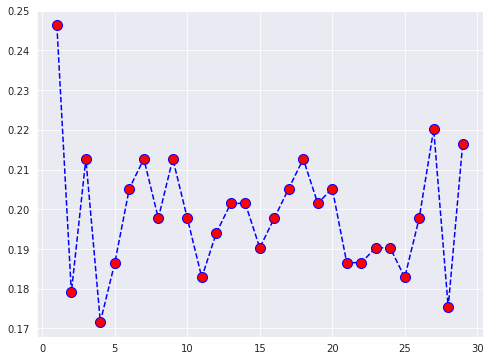

In [45]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (8,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
knn_train_acc = round(knn.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', knn_train_acc)
knn_test_acc = round(knn.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.78      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

Training Accuracy:  86.84
Testing Accuracy:  78.73


[Back to Contents(Click here)](#cont)

<a id = "subsec13"></a>
**Support Vector Machines**

In [47]:
# We will use GridSearchCV to find best parameters
svc = SVC()
param_grid = {'C': [0.01, 0.1, 1 ,10 , 100], 'kernel':['linear', 'rbf'], 'gamma':[0.1, 1, 10, 100]}
gcv = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, n_jobs=-1, refit=True)
gcv.fit(X_train, y_train)
gcv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [48]:
svc = SVC(C = 10, gamma = 0.1, kernel = 'rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
svc_train_acc = round(svc.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', svc_train_acc)
svc_test_acc = round(svc.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       183
           1       0.70      0.81      0.75        85

    accuracy                           0.83       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.84      0.83      0.83       268

Training Accuracy:  87.16
Testing Accuracy:  83.21


<a id = "subsec14"></a>
Decision Tree

In [49]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
dt_train_acc = round(dt.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', dt_train_acc)
dt_test_acc = round(dt.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       170
           1       0.77      0.77      0.77        98

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268

Training Accuracy:  85.07
Testing Accuracy:  82.84


[Back to Contents(Click here)](#cont)

<a id = "subsec15"></a>
**Random Forest**

In [50]:
rf = RandomForestClassifier()
param_grid = {'max_depth': [2, 4, 5, 6, 7, 8], 'criterion':['gini', 'entropy'], 'min_samples_leaf':[1, 2 ,4 ,6], 'max_features':['auto', 'log2'], 'n_estimators':[100,150,200]}
gcv = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 5, n_jobs = -1)
gcv.fit(X_train, y_train)
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [51]:
rf = RandomForestClassifier(max_depth = 8, min_samples_leaf = 6, n_estimators = 150)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
rf_train_acc = round(rf.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', rf_train_acc)
rf_test_acc = round(rf.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       181
           1       0.70      0.79      0.75        87

    accuracy                           0.82       268
   macro avg       0.80      0.82      0.81       268
weighted avg       0.83      0.82      0.83       268

Training Accuracy:  83.63
Testing Accuracy:  82.46


<a id = "subsec16"></a>
**AdaBoost**

In [52]:
adb = AdaBoostClassifier(rf, n_estimators = 200)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
adb_train_acc = round(adb.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', adb_train_acc)
adb_test_acc = round(adb.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       173
           1       0.74      0.77      0.76        95

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268

Training Accuracy:  90.85
Testing Accuracy:  82.46


<a id = "subsec17"></a>
Gradient Boosting

In [53]:
gdb = GradientBoostingClassifier()
params = {'learning_rate':[0.01,0.1,1,10],'n_estimators':[100,150,200,300],'subsample':[0.6,0.8,1.0],'max_depth':[2,3,4,6],'min_samples_leaf':[1,2,4,6]}
gcv = GridSearchCV(estimator=gdb, param_grid=params, cv=5, n_jobs=-1)
gcv.fit(X_train, y_train)
gcv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [54]:
gdb = GradientBoostingClassifier(max_depth = 2, n_estimators = 300, subsample = 0.8)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
gdb_train_acc = round(gdb.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', gdb_train_acc)
gdb_test_acc = round(gdb.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       173
           1       0.79      0.81      0.80        95

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.86      0.85      0.85       268

Training Accuracy:  86.36
Testing Accuracy:  85.45


[Back to Contents(Click here)](#cont)

<a id = "subsec18"></a>
XGBoost

In [55]:
xgbc = XGBClassifier(max_depth = 4)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
xgbc_train_acc = round(xgbc.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', xgbc_train_acc)
xgbc_test_acc = round(xgbc.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', xgbc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       182
           1       0.73      0.84      0.78        86

    accuracy                           0.85       268
   macro avg       0.83      0.85      0.83       268
weighted avg       0.86      0.85      0.85       268

Training Accuracy:  88.28
Testing Accuracy:  85.07


<a id = "sec4"></a>
# Accuracy Comparison through Plots

In [56]:
x = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree','Random Forest','AdaBoost','Gradient Boosting','XGBoost']
y1 = [lr_train_acc, knn_train_acc, svc_train_acc, dt_train_acc, rf_train_acc, adb_train_acc, gdb_train_acc, xgbc_train_acc]
y2 = [lr_test_acc, knn_test_acc, svc_test_acc, dt_test_acc, rf_test_acc, adb_test_acc, gdb_test_acc, xgbc_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'forestgreen'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'lawngreen'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# Creating Submission

In [57]:
test_df['Fare'] = pd.to_numeric(test_df['Fare'])

In [58]:
test_df['Survived'] = rf.predict(test_df.drop(['PassengerId'], axis = 1))
test_df[['PassengerId', 'Survived']].to_csv('MySubmission.csv', index = False)

[Back to Contents(Click here)](#cont)

# Please upvote if you think it's useful, any suggestions are welcome.